In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
student_data=pd.read_csv("data/student_por (1).csv")
df_student=student_data
df_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [43]:
df_student['higher'].map({'yes': 1, 'no': 0})

0      1
1      1
2      1
3      1
4      1
      ..
644    1
645    1
646    1
647    1
648    1
Name: higher, Length: 649, dtype: int64

In [6]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

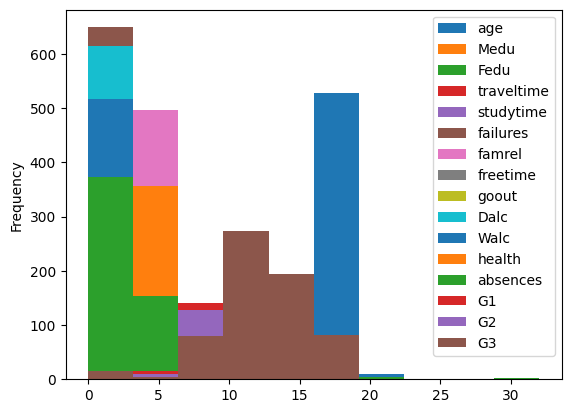

In [7]:
df_student.plot(kind="hist");

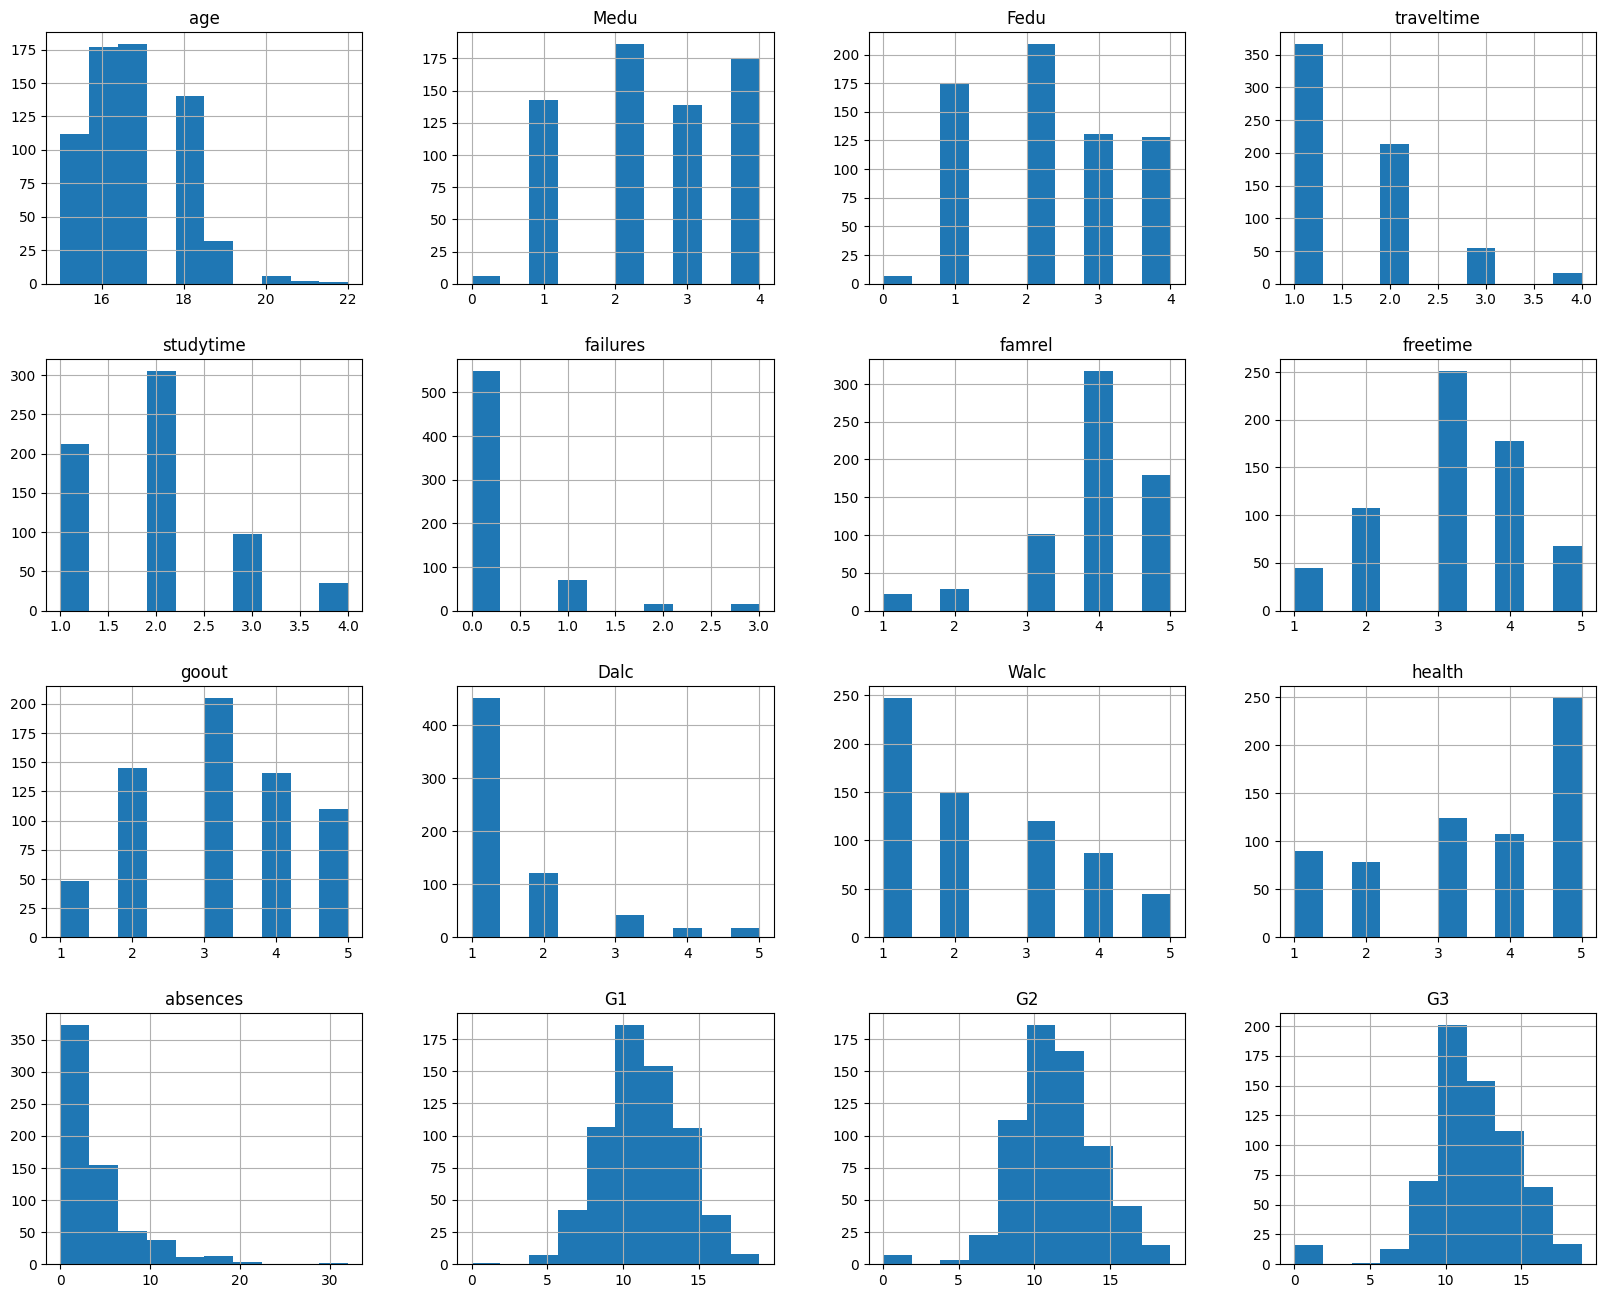

In [8]:
df_student.hist(figsize=(20,16));

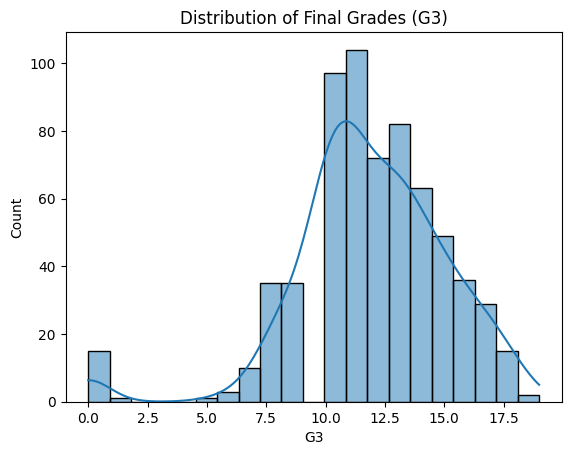

In [9]:
sns.histplot(df_student['G3'], kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.show()

In [10]:
df_student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [11]:
final_grade=df_student['G3']
at_risk = [1 if G3 < 7.5 else 0 for G3 in final_grade]
df_student['at_risk'] = at_risk



In [12]:

df_student.groupby("internet")['G3'].count()

internet
no     151
yes    498
Name: G3, dtype: int64

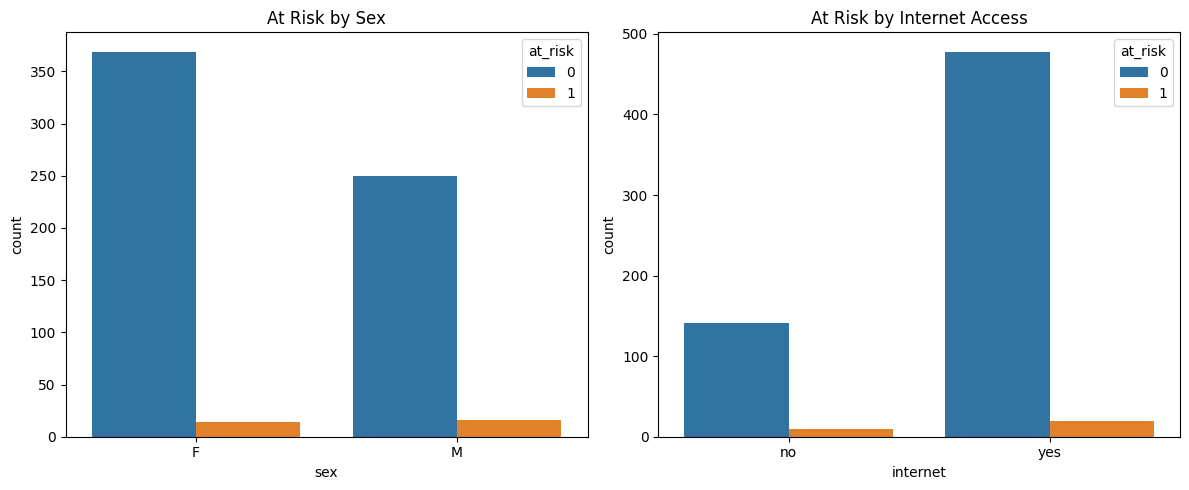

In [13]:
# Who is at risk ??
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='sex', hue='at_risk', data=df_student, ax=axes[0])
axes[0].set_title("At Risk by Sex")

sns.countplot(x='internet', hue='at_risk', data=df_student, ax=axes[1])
axes[1].set_title("At Risk by Internet Access")

plt.tight_layout()
plt.show()

In [14]:
#gender counting by %
df_student['sex'].value_counts(normalize=True)


sex
F    0.590139
M    0.409861
Name: proportion, dtype: float64

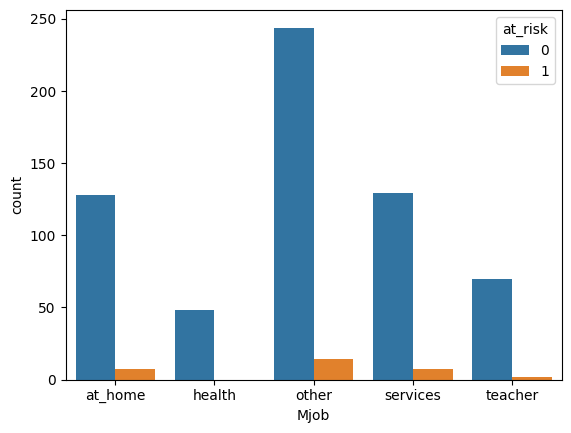

In [15]:
#looking into mjob 
sns.countplot(x="Mjob",hue="at_risk",data=df_student)
plt.show()

<Axes: xlabel='Fjob', ylabel='count'>

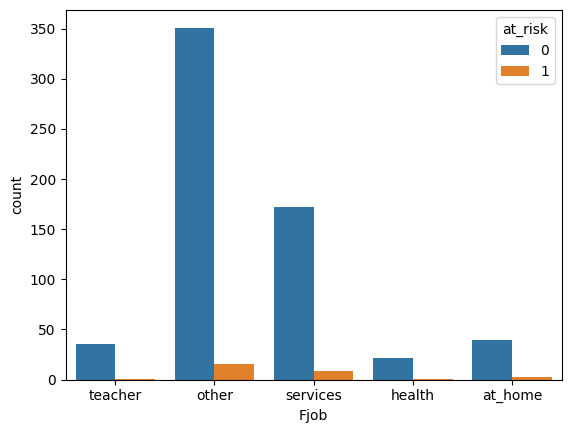

In [16]:
#looking into Fjob  
sns.countplot(x="Fjob",hue="at_risk",data=df_student)

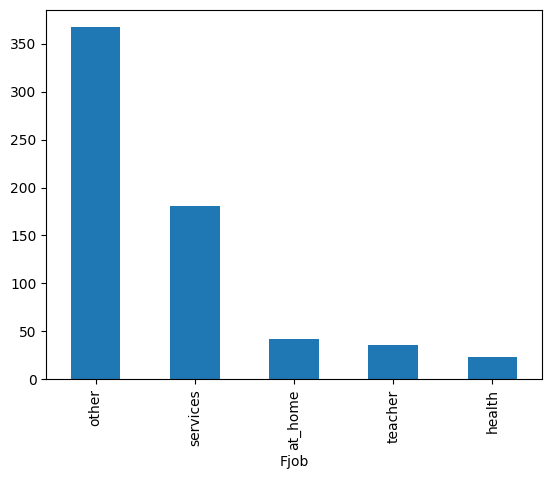

In [17]:
df_student['Fjob'].value_counts().plot(kind='bar')
plt.show()

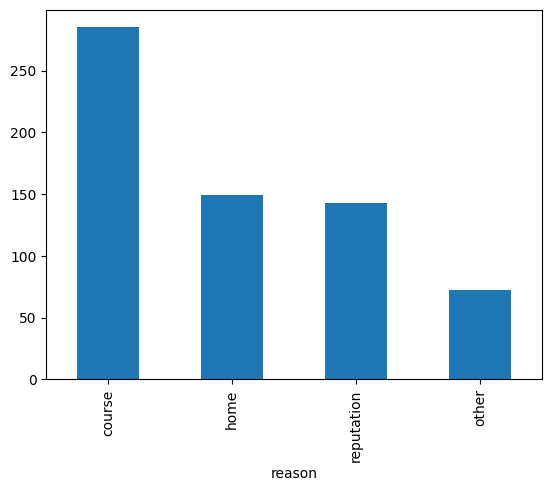

In [18]:
df_student['reason'].value_counts().plot(kind='bar')
plt.show()

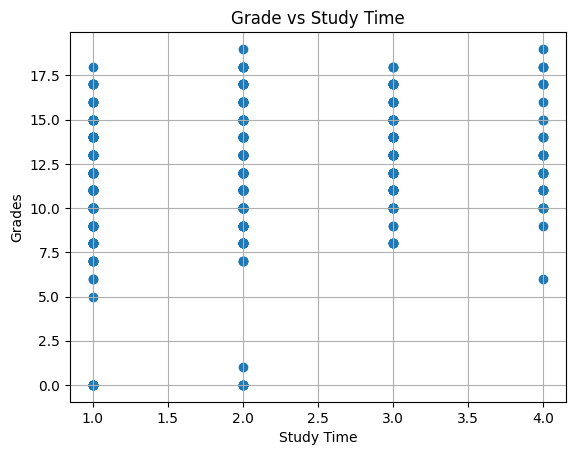

In [19]:
second_period_grade=df_student["G2"]
studytime=df_student["studytime"]
first_period_grade=df_student['G1']
plt.scatter(studytime,final_grade)
#plt.plot(studytime,second_period_grade,'g',label="second_period_grade(G2)")
#plt.plot(studytime,first_period_grade,'r',label="first_period_grade(G1)")
plt.xlabel("Study Time")
plt.ylabel("Grades")
plt.title("Grade vs Study Time")

plt.grid(True)
plt.show()


<Axes: >

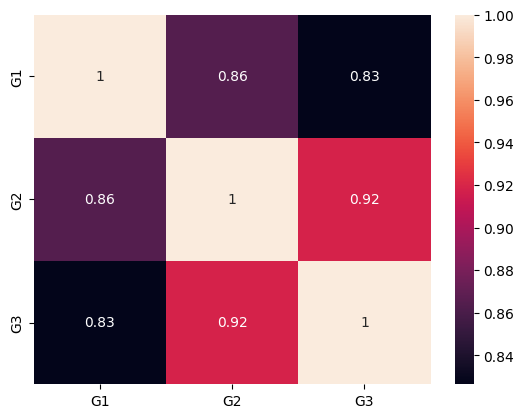

In [20]:
#grades corellation
sns.heatmap(df_student[['G1', 'G2', 'G3']].corr(), annot=True)

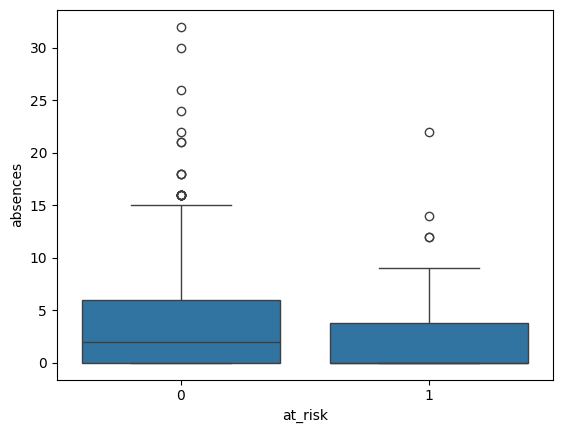

In [21]:
#risk due to class absence
sns.boxplot(x='at_risk', y='absences', data=df_student)
plt.show()

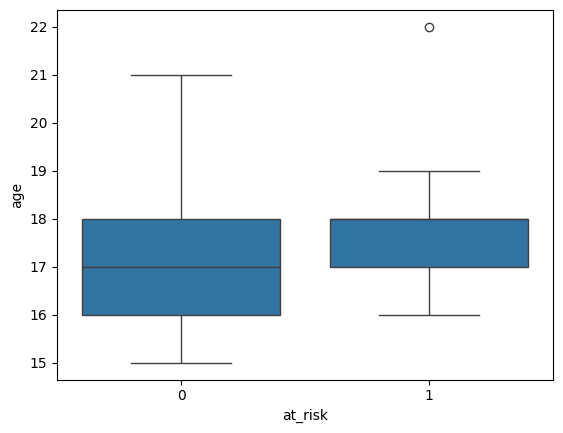

In [22]:
#low grade is  caused  by age???
sns.boxplot(x='at_risk', y='age', data=df_student)
plt.show()

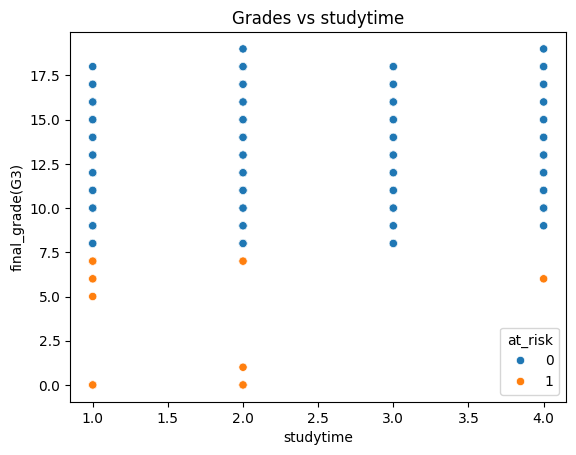

In [23]:
#let's see  study habit
sns.scatterplot(x='studytime', y='G3', hue='at_risk', data=df_student)
plt.ylabel("final_grade(G3)")
plt.title("Grades vs studytime")
plt.show()


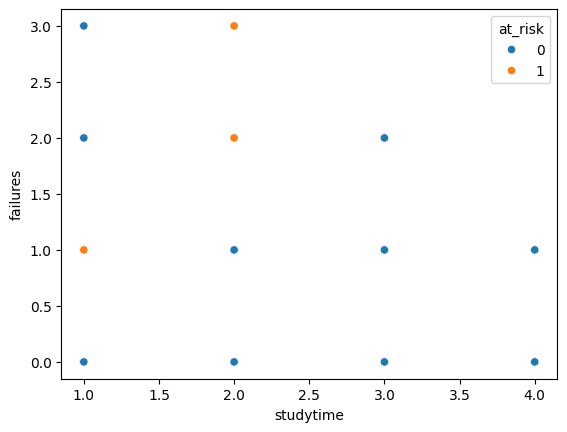

In [24]:
sns.scatterplot(x='studytime', y='failures', hue='at_risk', data=df_student)
plt.show()

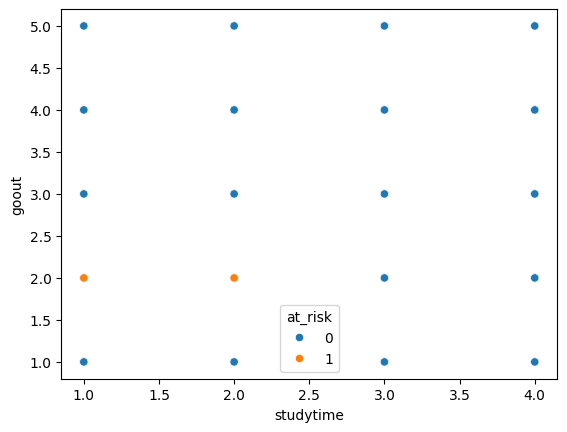

In [25]:
sns.scatterplot(x='studytime', y='goout', hue='at_risk', data=df_student)
plt.show()


In [26]:
#notice--famlrel,fed,med are already encoded into ordinal encoder
#let's use one hot encoder for mjob,fjob,use pd.get_dummies


In [27]:
df_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,at_risk
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,0


<Axes: xlabel='address', ylabel='G3'>

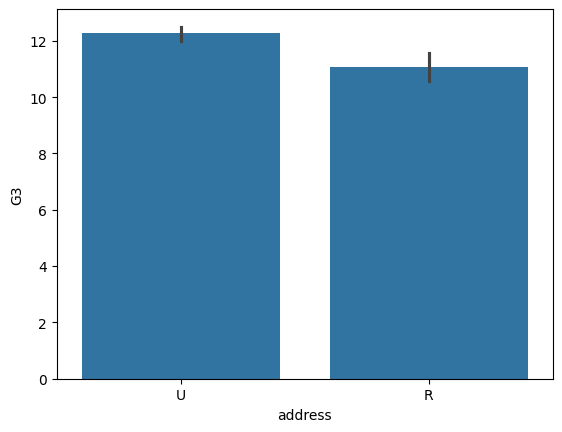

In [28]:
sns.barplot(x="address",y="G3",data=df_student)

In [29]:
#df_student = pd.get_dummies(df_student, columns=['Mjob', 'Fjob', 'reason'])

In [30]:
df_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,at_risk
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,0


In [31]:
df_student.select_dtypes(exclude="object").corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,at_risk
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505,0.178895
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151,-0.048153
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800,-0.114831
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173,-0.000559
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789,-0.123238
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316,0.276602
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361,-0.014753
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705,0.080991
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641,0.084029
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719,0.142384


In [32]:
#B .Feature creation.......
df_student.select_dtypes(include="object").columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [33]:
#splitting data for training and test
from sklearn.model_selection import train_test_split
#drop column that irrelevant 
attr_drop=["school","guardian","reason",'Medu','Fedu'
        
           ,"G3"]
            
X=df_student.drop(attr_drop,axis=1)#dropping target from trainset
y=df_student["G3"]#target 
#trainset and testset .we are using 20% for test rest is for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#extract categorical features and numericals
cat_features=list(X_train.select_dtypes(include="object").columns)#cat-features
num_features=list(X_train.select_dtypes(exclude="object").columns)# numeric features

In [35]:
type(num_features)

list

In [36]:
#preparing data
data_preprocessor=ColumnTransformer(transformers=[("num",StandardScaler(),num_features),
                                                  ("cat",OneHotEncoder(handle_unknown='ignore'),cat_features)
                                                 
                                                 ])
data_preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'traveltime', 'studytime', 'failures',
                                  'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
                                  'health', 'absences', 'G1', 'G2',
                                  'at_risk']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'address', 'famsize', 'Pstatus',
                                  'Mjob', 'Fjob', 'schoolsup', 'famsup', 'paid',
                                  'activities', 'nursery', 'higher', 'internet',
                                  'romantic'])])

In [37]:
#first we try OLR MODEL
from sklearn.linear_model import LinearRegression

linear_reg_model=Pipeline(steps=[("preprocessor",data_preprocessor),
                                 ("linear_model",LinearRegression())])



In [38]:
linear_reg_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'traveltime',
                                                   'studytime', 'failures',
                                                   'famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'absences', 'G1',
                                                   'G2', 'at_risk']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'address', 'famsize',
                                                   'Pstatus', 'Mjob', 'Fjob',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('linear_model', LinearRegression())])

In [39]:
linear_reg_model.fit(X_train,y_train)# train model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'traveltime',
                                                   'studytime', 'failures',
                                                   'famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'absences', 'G1',
                                                   'G2', 'at_risk']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'address', 'famsize',
                                                   'Pstatus', 'Mjob', 'Fjob',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('linear_model', LinearRegression())])

In [40]:
y_train_predict=linear_reg_model.predict(X_train)

In [165]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_train,y_train_predict)
mse=np.sqrt(mse)
mse

np.float64(1.040847222140505)

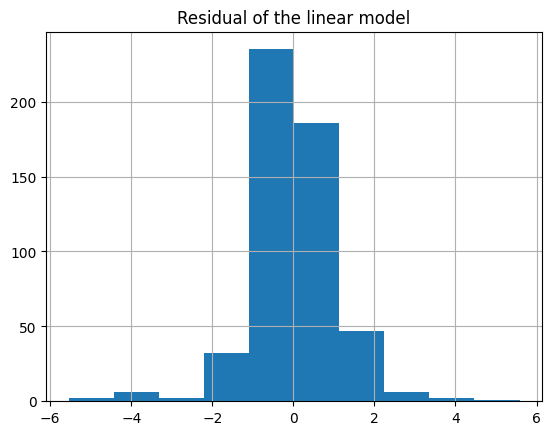

In [166]:
residual=y_train-y_train_predict
residual.hist()
plt.title("Residual of the linear model")
plt.show()

In [167]:
#evaluating by cross_val_score
from sklearn.model_selection import cross_val_score
score_mse=cross_val_score(linear_reg_model,X_train,y_train, scoring="neg_mean_squared_error",cv=5)


In [168]:
def display_scores(scores):     
    print("Scores:", scores) 
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [169]:
display_scores(score_mse)

Scores: [-1.1863687  -1.98138663 -1.24691595 -1.26364523 -0.78693485]
Mean: -1.2930502731591413
Standard deviation: 0.3858325424718722


In [170]:
#random_forest
from sklearn.ensemble import RandomForestRegressor
# randomforest pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', data_preprocessor),
    ('regressor', RandomForestRegressor())])
model_pipeline 
    

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'traveltime',
                                                   'studytime', 'failures',
                                                   'famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'absences', 'G1',
                                                   'G2', 'at_risk']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'address', 'famsize',
                                                   'Pstatus', 'Mjob', 'Fjob',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('regressor', RandomForestRegressor())])

In [171]:
# Train
model_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'traveltime',
                                                   'studytime', 'failures',
                                                   'famrel', 'freetime',
                                                   'goout', 'Dalc', 'Walc',
                                                   'health', 'absences', 'G1',
                                                   'G2', 'at_risk']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'address', 'famsize',
                                                   'Pstatus', 'Mjob', 'Fjob',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('regressor', RandomForestRegressor())])

In [172]:
mse_randomforest=mean_squared_error(y_train,model_pipeline.predict(X_train))
mse_randomforest=np.sqrt(mse_randomforest)
mse_randomforest

np.float64(0.36446756901430677)

In [173]:
score_randomforest=cross_val_score(model_pipeline,X_train,y_train, 
                                   scoring="neg_mean_squared_error",cv=5)

In [174]:
display_scores(score_randomforest)

Scores: [-1.04348846 -1.22114423 -0.75537788 -0.94738558 -0.89121165]
Mean: -0.9717215608663181
Standard deviation: 0.1557182252219531


In [175]:
#fine_tunning forestregression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
#random_forest_model_pipeline
tunned_forest_reg=Pipeline(steps=[
    ('preprocessor', data_preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))])
# Hyperparameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],  # Number of trees
    'regressor__max_depth': [10, 20, None],       # Depth of trees
    'regressor__min_samples_split': [2, 5, 10],   # Min samples to split a node
    'regressor__min_samples_leaf': [1, 2, 4],     # Min samples at a leaf node
    'regressor__max_features': ['sqrt', 'log2']   # Features to consider for splits
}
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=tunned_forest_reg,
    param_grid=param_grid,
    cv=5,                   # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Optimize for RMSE
    verbose=2,              # Print progress
    n_jobs=-1               # Use all CPU cores
)


##param_grid = [
## {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
## {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
## ]
##grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
##     scoring='neg_mean_squared_error',
 #    return_train_score=True)


In [176]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'traveltime',
                                                                          'studytime',
                                                                          'failures',
                                                                          'famrel',
                                                                          'freetime',
                                                                          'goout',
                                                                          'Dalc',
                                                                          'Walc',
                                                                          'health',
                                                                          'absences',
                                                                          'G1',
                                                                          'G2',
                                                                          'at_risk']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['sex',
                                                                          'address',
                                                                          'famsize',
                                                                          'Pstatus',
                                                                          'Mjob',
                                                                          'Fjob',
                                                                          'schoolsup...
                                                                          'higher',
                                                                          'internet',
                                                                          'romantic'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [10, 20, None],
                         'regressor__max_features': ['sqrt', 'log2'],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [177]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_predictor_model = grid_search.best_estimator_

Best Hyperparameters: {'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}


In [178]:
# Predict on test data
y_pred = best_predictor_model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 1.25
R²: 0.84


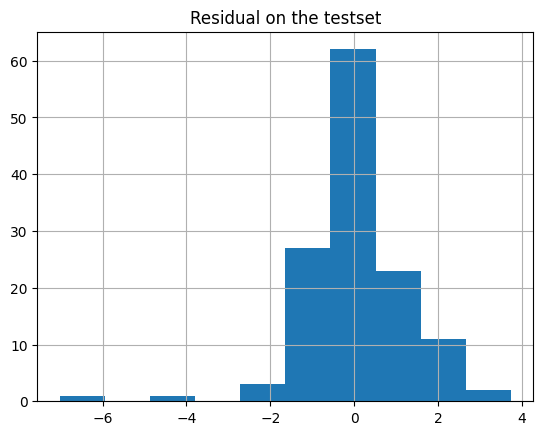

In [179]:
residual_testset=y_test-y_pred
residual_testset.hist()
plt.title("Residual on the testset")
plt.show()

In [188]:
# Extract feature importances from the best model
importances = best_predictor_model.named_steps['regressor'].feature_importances_

# Get feature names after preprocessing
feature_names = (
    num_features + 
    best_predictor_model.named_steps['preprocessor'].named_transformers_['cat']
    .get_feature_names_out(cat_features).tolist()
)

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))  # Top 10 important features

      Feature  Importance
12         G2    0.273939
11         G1    0.235916
13    at_risk    0.107052
3    failures    0.046174
10   absences    0.025189
42  higher_no    0.018358
2   studytime    0.017629
0         age    0.017464
7        Dalc    0.016809
6       goout    0.016351


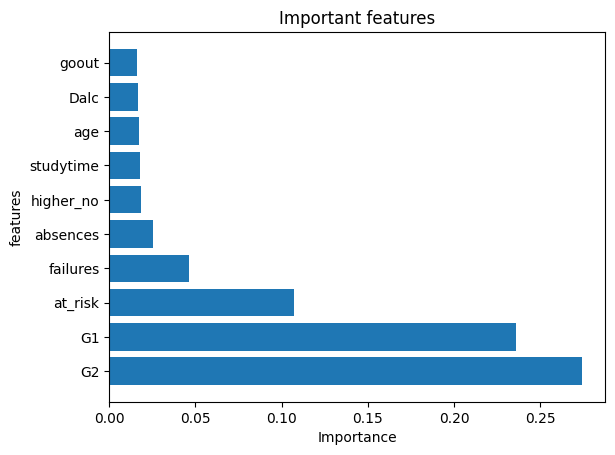

In [199]:

y=importance_df['Feature'].head(10)
plt.barh(y,width=importance_df['Importance'].head(10))
plt.ylabel("features")
plt.xlabel("Importance")
plt.title("Important features")
plt.show()

In [201]:
#let's check
from joblib import load

# Load the model
loaded_model = load('student_performance_predictor_model.joblib')

# Example prediction
sample_data = X_test.iloc[0:1]  # Use a DataFrame row from your dataset
prediction = loaded_model.predict(sample_data)
print(f"Predicted Final Grade: {prediction[0]:.2f}")

Predicted Final Grade: 15.26


In [256]:
#selecting important  features 
features = ['G1', 'G2', 'failures', 'absences', 'higher', 'studytime', 'age', 'Dalc', 'goout']
target = 'at_risk'
X=df_student.drop(target,axis=1)
y=df_student[target]

In [257]:
#feature splitting
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, stratify=y)

In [258]:
#encoding features
#extract categorical features and numericals
cat_features=list(X_trainset.select_dtypes(include="object").columns)
num_features=list(X_trainset.select_dtypes(exclude="object").columns)
#encoding features
preprocessor=ColumnTransformer(transformers=[("num",StandardScaler(),num_features),
                                                  ("cat",OneHotEncoder(handle_unknown='ignore'),cat_features)
                                                 
                                                 ])
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'Medu', 'Fedu', 'traveltime',
                                  'studytime', 'failures', 'famrel', 'freetime',
                                  'goout', 'Dalc', 'Walc', 'health', 'absences',
                                  'G1', 'G2', 'G3']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['school', 'sex', 'address', 'famsize',
                                  'Pstatus', 'Mjob', 'Fjob', 'reason',
                                  'guardian', 'schoolsup', 'famsup', 'paid',
                                  'activities', 'nursery', 'higher', 'internet',
                                  'romantic'])])

In [259]:
from sklearn.ensemble import RandomForestClassifier

classif_pipeline=Pipeline(steps=[("preprocessor",preprocessor),
                                 ("classification_model",RandomForestClassifier())])

In [260]:
classif_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health', 'absences',
                                                   'G1', 'G2', 'G3']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('classification_model', RandomForestClassifier())])

In [261]:
classif_pipeline.fit(X_trainset,y_trainset)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health', 'absences',
                                                   'G1', 'G2', 'G3']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('classification_model', RandomForestClassifier())])

In [262]:
y_pred=classif_pipeline.predict(X_trainset)

In [263]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_trainset,y_pred)
print("the accuracy score: ",accuracy)

the accuracy score:  1.0


In [264]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_mrx=confusion_matrix(y_trainset,y_pred)

print(classification_report(y_trainset, y_pred))
confusion_mrx

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       495
           1       1.00      1.00      1.00        24

    accuracy                           1.00       519
   macro avg       1.00      1.00      1.00       519
weighted avg       1.00      1.00      1.00       519



array([[495,   0],
       [  0,  24]])

In [255]:
#y_test_pred=classif_pipeline.predict(X_testset)
#evaluate on test set


In [266]:
from sklearn.metrics import precision_score,recall_score
percision=precision_score(y_trainset,y_pred)
recall=recall_score(y_trainset,y_pred)
print("Precision score: ",percision)
print("Recall score: ",recall)

Precision score:  1.0
Recall score:  1.0


In [273]:
#
from sklearn .linear_model import LogisticRegression
logistic_reg_pipeline=Pipeline(steps=[("preprocessor",preprocessor),
                                 ("logistic_reg_model",LogisticRegression())])

In [275]:
logistic_reg_pipeline.fit(X_trainset,y_trainset)
y_logistic_pred=logistic_reg_pipeline.predict(X_trainset)

In [276]:
accuracy_score(y_trainset,y_logistic_pred)

1.0

In [277]:
confusion_mtrx=confusion_matrix(y_trainset,y_logistic_pred)
confusion_mtrx

array([[495,   0],
       [  0,  24]])

In [278]:
#randomforestclassifier on the testset
y_test_pred=classif_pipeline.predict(X_testset)


In [279]:
confusion_mrx_test=confusion_matrix(y_testset,y_test_pred)

print(classification_report(y_testset, y_test_pred))
confusion_mrx_test

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       124
           1       1.00      0.83      0.91         6

    accuracy                           0.99       130
   macro avg       1.00      0.92      0.95       130
weighted avg       0.99      0.99      0.99       130



array([[124,   0],
       [  1,   5]])

In [281]:
#measure the perfomance of the logistic regression
confusion_mrx_log=confusion_matrix(y_testset,y_logist_pred)

print(classification_report(y_testset, y_logist_pred))
confusion_mrx_log

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       124
           1       1.00      0.67      0.80         6

    accuracy                           0.98       130
   macro avg       0.99      0.83      0.90       130
weighted avg       0.98      0.98      0.98       130



array([[124,   0],
       [  2,   4]])

In [5]:
features=['G1', 'G2','G3', 'studytime', 'failures', 'absences', 'age', 'sex', 'Medu', 'internet', 'schoolsup']

In [6]:
data_set=df_student[features]

In [7]:
data_set.head()

,G1,G2,G3,studytime,failures,absences,age,sex,Medu,internet,schoolsup
0,0,11,11,2,0,4,18,F,4,no,yes
1,9,11,11,2,0,2,17,F,1,yes,no
2,12,13,12,2,0,6,15,F,1,yes,yes
3,14,14,14,3,0,0,15,F,4,yes,no
4,11,13,13,2,0,0,16,F,3,no,no


In [8]:
target='G3'
y=data_set[target]
X=data_set.drop(target,axis=1)

In [23]:
import joblib
predictor_model=joblib.load("student_performance_predictor_model.joblib")

In [24]:
model_again=predictor_model.predict(X)

In [25]:
from sklearn.metrics import mean_squared_error
model_again=predictor_model.predict(X)
mse= mean_squared_error(y,model_again)
mse=np.sqrt(mse)
mse

np.float64(0.7191364021303812)

In [ ]:
selected_features = ['G1', 'G2', 'failures', 'absences', 'higher', 'studytime', 'age', 'Dalc', 'goout']
X_selected = df_student[selected_features]
y = df_student['G3']

# Load model
import joblib
predictor_model = joblib.load("student_performance_predictor_model.joblib")

# Predict and evaluate
from sklearn.metrics import mean_squared_error
y_pred = predictor_model.predict(X_selected)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE with selected features:", rmse)
